In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [3]:
df= pd.read_csv('data/StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
x = df.drop('math score', axis=1)
y = df['math score']


In [5]:
#create column transformer with 3 types of transformers

num_features = x.select_dtypes(exclude='object').columns
cat_features = x.select_dtypes(include='object').columns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

processor = ColumnTransformer([
    ("OneHotEncoder", oh_transformer, cat_features),
    ("StandardScaler", numeric_transformer, num_features)
])

In [6]:
x = processor.fit_transform(x)

In [7]:
#separate dataset into train and test
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=1)

In [8]:
xtrain.shape, xtest.shape

((800, 19), (200, 19))

In [9]:
#create a function to evaluate the model using all metrics

def evaluate_model(act, pred):
    mae = mean_absolute_error(act, pred)
    mse = mean_squared_error(act, pred)
    rmse = np.sqrt(mean_squared_error(act, pred))
    r2 = r2_score(act,pred)
    return mae, rmse, r2

In [15]:
models = {
    "Linear_Regression" :LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "k-neighbours_regressor": KNeighborsRegressor(),
    "DecisionTreeRegressor" : DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoostRegressor": CatBoostRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(xtrain, ytrain)  #train the model
    
    #Predictions
    ytrain_pred = model.predict(xtrain)
    ytest_pred = model.predict(xtest)
    
    #evaluate train and test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(ytrain, ytrain_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(ytest, ytest_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    r2_list.append(model_test_r2)
    
    print("Model performance for Training set")
    print("Mean absolute error:", model_train_mae)
    print("Root mean squared error:", model_train_rmse)
    print("R2_Score:", model_train_r2)
    print('------------------------------------------------------------')
    print("Model performance for Test set")
    print("Mean absolute error:", model_test_mae)
    print("Root mean squared error:", model_test_rmse)
    print("R2_Score:", model_test_r2)
    
    print('=' *35)
    print()

Linear_Regression
Model performance for Training set
Mean absolute error: 4.33984375
Root mean squared error: 5.435816010786697
R2_Score: 0.868891764715768
------------------------------------------------------------
Model performance for Test set
Mean absolute error: 3.9865625
Root mean squared error: 5.086860755293976
R2_Score: 0.8945701466153279

Lasso
Model performance for Training set
Mean absolute error: 5.241810134590587
Root mean squared error: 6.624450512210875
R2_Score: 0.8052846476062456
------------------------------------------------------------
Model performance for Test set
Mean absolute error: 5.093528853464246
Root mean squared error: 6.464978579476424
R2_Score: 0.8297064952059503

Ridge
Model performance for Training set
Mean absolute error: 4.319456213282094
Root mean squared error: 5.4000538652742405
R2_Score: 0.8706112078681403
------------------------------------------------------------
Model performance for Test set
Mean absolute error: 3.9876107745563423
Root me

In [16]:
#Result

pd.DataFrame(list(zip(model_list, r2_list)), columns=["Model Name","R2_score"]).sort_values(by=['R2_score'],ascending=False)

,Model Name,R2_score
2,Ridge,0.895447
0,Linear_Regression,0.894570
7,CatBoostRegressor,0.876273
5,RandomForestRegressor,0.857577
8,AdaBoostRegressor,0.838423
6,XGBRegressor,0.836210
1,Lasso,0.829706
3,k-neighbours_regressor,0.805870
4,DecisionTreeRegressor,0.731741


In [17]:
#Linear Regression

linear_model = LinearRegression(fit_intercept=True)
linear_model = linear_model.fit(xtrain, ytrain)
ypred = linear_model.predict(xtest)
score = r2_score(ytest,ypred) *100
print("Accuracy is %.2f"%score)

Accuracy is 89.46


Text(0, 0.5, 'Predicted')

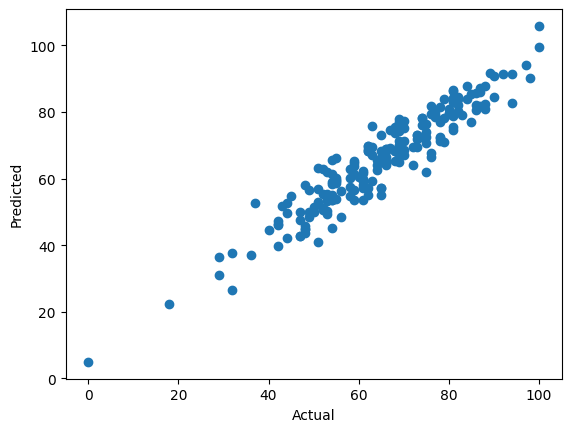

In [21]:
#plot ytest and ypred

plt.scatter(ytest, ypred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

<Axes: xlabel='math score'>

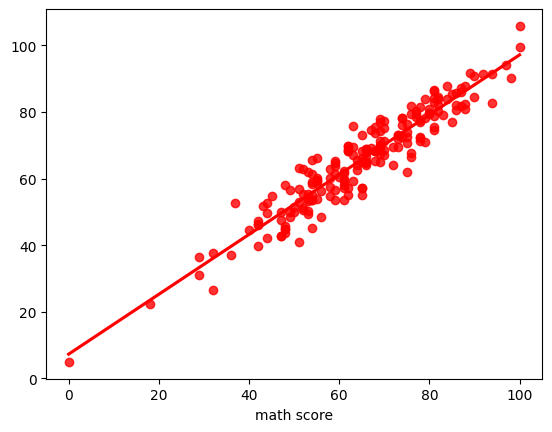

In [22]:
sns.regplot(x=ytest,y=ypred,ci=None,color='r')

In [23]:
#Difference between Predicted and actual values

pred_df = pd.DataFrame({'Actual value': ytest, 'Predicted value': ypred, 'Difference': ytest - ypred})
pred_df

,Actual value,Predicted value,Difference
507,55,59.3125,-4.3125
818,60,60.5000,-0.5000
452,65,65.0625,-0.0625
368,44,49.5625,-5.5625
242,56,48.3750,7.6250
...,...,...,...
430,64,64.1250,-0.1250
874,43,51.6875,-8.6875
550,79,71.0000,8.0000
608,61,61.8125,-0.8125
